# Marketing Exploratory Data Analysis (EDA)

Persoalan Pertama:
- Cek apakah format data sudah sesuai
- Cek apakah ada data yang kosong dan outliers(data yang bernilai ekstrem), jika ada bagaimana mengatasinya?
- Apakah ada variabel baru yang bisa memberikan insight lebih?
- Apakah ada pola aneh dalam data? Bisakah kamu memperlihatkannya?
- Apakah ada relasi antara latar belakang/kondisi pelanggan terhadap kebiasaan berbelanja? 

Persoalan Kedua:
- Kampanye iklan mana yang paling sukses?
- Gambaran umum mengenai latar belakang pelanggan 
- Produk apa yang banyak diminati pelanggan?
- Melalui apa pelanggan banyak berbelanja?(Toko, Website, Katalog, Diskon)
- Distribusi dari tiap data yang bisa diambil
- Tampilkan BarChart dari kategori, produk, dan sebagainya
- Tampilkan komplain yang belum direspon

In [73]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [74]:
df = pd.read_csv('ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

- Format Sudah Sesuai

In [76]:
df.duplicated().sum()

184

In [77]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

- Ada data duplikat tapi tidak ada data yang kosong, data duplikat perlu dihapus

In [78]:
df = df.drop_duplicates()
df.duplicated().sum()

0

- Data yang terduplikasi sudah dihapus

In [79]:
remove_columns = ['Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow','education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD','AcceptedCmpOverall','MntTotal']
df_outlier = df.drop(columns=remove_columns)
df_outlier.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days',
       'MntRegularProds'],
      dtype='object')

- Hapus kolom yang tidak dibutuhkan untuk cek outlier, contoh data dengan label 0 dan 1

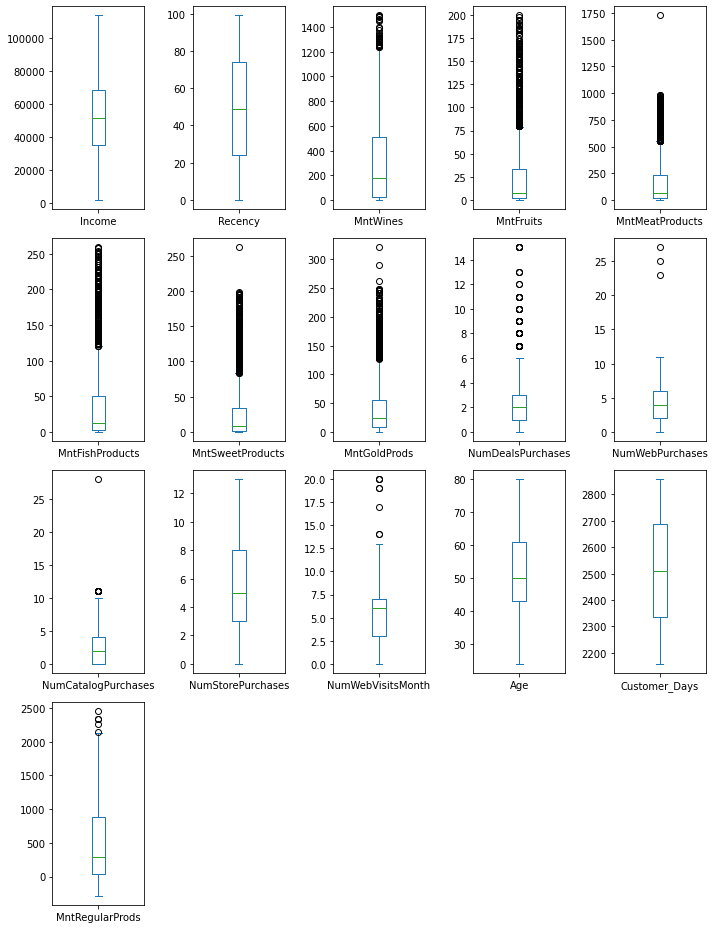

In [80]:
df_outlier.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

- Data yang memiliki outlier sedikit akan dibuang (digantikan nilai mean atau median)
- Sedangkan data yang memiliki outlier terlalu banyak tidak dibuang, karena menurut definisinya outlier tersebut jarang terjadi, fenomena itu berarti ada sesuatu yang kasuistik pada data yang perlu telaah lebih lanjut.
- Data diatas yang akan digantikan nilai outliernya adalah **NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumWebVisitsMonth, MntRegularProds**

- Tindakan untuk mengatasi outlier yang saya gunakan menggunakan Jangkauan antar kuartil(IQR) dimana nilai diatas batas atas akan kita ganti dengan nilai median

In [81]:
deals_median = df_outlier['NumDealsPurchases'].median()
Q1 = df_outlier['NumDealsPurchases'].quantile(0.25)

Q3 = df_outlier['NumDealsPurchases'].quantile(0.75)

IQR = Q3 - Q1

deals_outlier = Q3 + 1.5*IQR

In [82]:
df['NumDealsPurchases'] = np.where(df['NumDealsPurchases'] >deals_outlier, deals_median,df['NumDealsPurchases'])

C:\Users\MrBento\AppData\Local\Temp\ipykernel_2876\1596089066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumDealsPurchases'] = np.where(df['NumDealsPurchases'] >deals_outlier, deals_median,df['NumDealsPurchases'])


In [83]:
web_median = df_outlier['NumWebPurchases'].median()
Q1 = df_outlier['NumWebPurchases'].quantile(0.25)
Q3 = df_outlier['NumWebPurchases'].quantile(0.75)
IQR = Q3-Q1
web_outlier = Q3+1.5*IQR

In [84]:
df['NumWebPurchases'] = np.where(df['NumWebPurchases'] >web_outlier, web_median,df['NumWebPurchases'])

C:\Users\MrBento\AppData\Local\Temp\ipykernel_2876\3558669350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumWebPurchases'] = np.where(df['NumWebPurchases'] >web_outlier, web_median,df['NumWebPurchases'])


In [85]:
cat_median = df_outlier['NumCatalogPurchases'].median()
Q1 = df_outlier['NumCatalogPurchases'].quantile(0.25)
Q3 = df_outlier['NumCatalogPurchases'].quantile(0.75)
IQR = Q3-Q1
cat_outlier = Q3+1.5*IQR

In [86]:
df['NumCatalogPurchases'] = np.where(df['NumCatalogPurchases'] >cat_outlier, cat_median,df['NumCatalogPurchases'])

C:\Users\MrBento\AppData\Local\Temp\ipykernel_2876\399363978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumCatalogPurchases'] = np.where(df['NumCatalogPurchases'] >cat_outlier, cat_median,df['NumCatalogPurchases'])


In [87]:
visit_median = df_outlier['NumWebVisitsMonth'].median()
Q1 = df_outlier['NumWebVisitsMonth'].quantile(0.25)
Q3 = df_outlier['NumWebVisitsMonth'].quantile(0.75)
IQR = Q3-Q1
visit_outlier = Q3+1.5*IQR

In [88]:
df['NumWebVisitsMonth'] = np.where(df['NumWebVisitsMonth'] >visit_outlier, visit_median,df['NumWebVisitsMonth'])

C:\Users\MrBento\AppData\Local\Temp\ipykernel_2876\3167451844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumWebVisitsMonth'] = np.where(df['NumWebVisitsMonth'] >visit_outlier, visit_median,df['NumWebVisitsMonth'])


In [89]:
Reg_median = df_outlier['MntRegularProds'].median()
Q1 = df_outlier['MntRegularProds'].quantile(0.25)
Q3 = df_outlier['MntRegularProds'].quantile(0.75)
IQR = Q3-Q1
reg_outlier = Q3+1.5*IQR

In [90]:
df['MntRegularProds'] = np.where(df['MntRegularProds'] >reg_outlier, Reg_median,df['MntRegularProds'])

C:\Users\MrBento\AppData\Local\Temp\ipykernel_2876\3614171303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MntRegularProds'] = np.where(df['MntRegularProds'] >reg_outlier, Reg_median,df['MntRegularProds'])


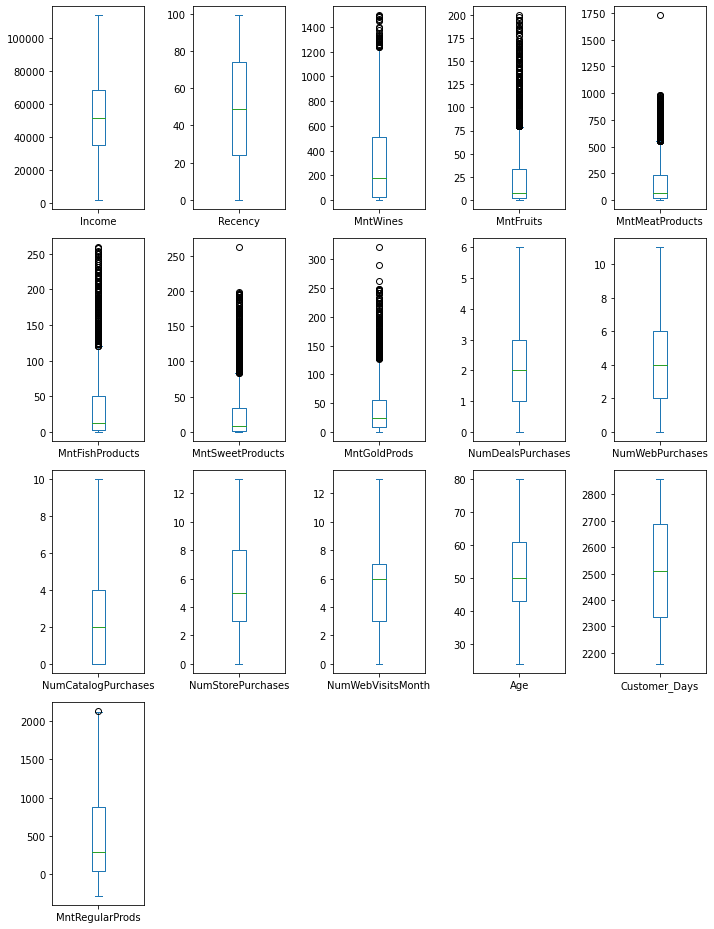

In [91]:
df_outlier_cleaned = df.drop(columns=remove_columns)

df_outlier_cleaned.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

- Data yang mengandung Outlier sudah dibersihkan

# Variable Insight

In [92]:
df['Children'] = df['Kidhome']+df['Teenhome']

C:\Users\MrBento\AppData\Local\Temp\ipykernel_2876\3339246157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Children'] = df['Kidhome']+df['Teenhome']


**Income and Dependents**

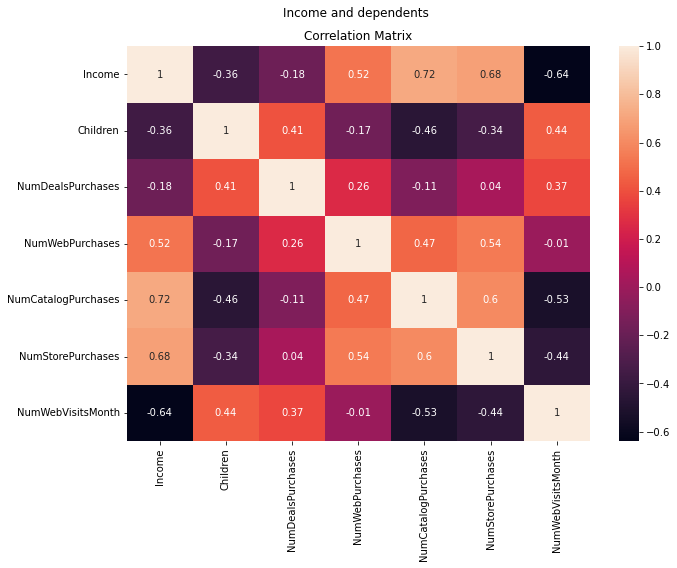

In [93]:
df_indep = pd.DataFrame(df[['Income','Children','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])

plt.figure(figsize=(10,8))
sns.heatmap(df_indep.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Income and dependents')
plt.tight_layout()

- Terlihat bahwa variabel **Income** mempunyai korelasi pada **Web, Catalog, dan Store** artinya jika income seseorang meningkat maka kebiasaan membeli juga meningkat.
- Apabila seseorang mempunyai anak (**Children**) maka korelasi yang terbesar adalah sering mencari barang di internet daripada pergi ke toko maupun katalog
- Hal yang unik dari data tersebut adalah kunjungan ke website tidak terlalu berpengaruh terhadap penjualan pada website, variable kunjungan website **NumWebVisitsMonth** memiliki korelasi positif terhadap Deals/Diskon, sehingga asumsinya pembeli lebih tertarik membeli di website apabila ada Deals/Diskon (**NumDealsPurchases**)

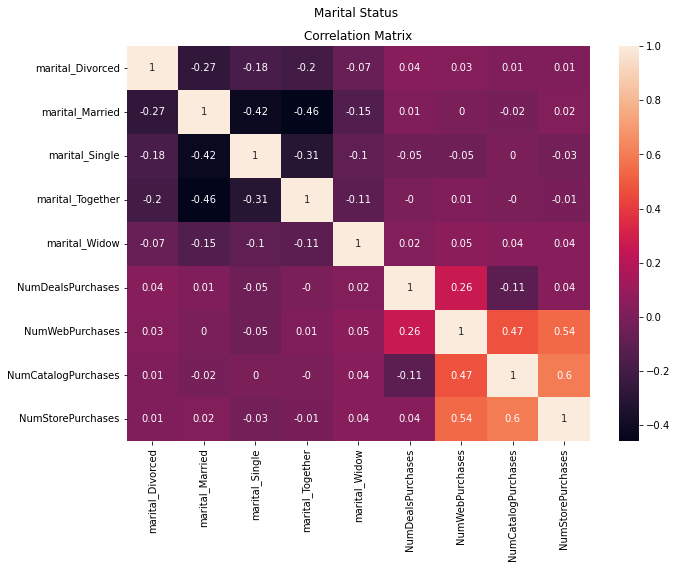

In [94]:
df_marital = pd.DataFrame(df[['marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']])

plt.figure(figsize=(10,8))
sns.heatmap(df_marital.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Marital Status')
plt.tight_layout()

**Marital Status** tidak memiliki korelasi apapun terhadap penjualan

**Education Degree Correlation Matrix**

In [95]:
df['education_MasterDegree'] = df['education_2n Cycle'] + df['education_Master'] #2n cycle dan master adalah sama
#sehingga dijadikan 1 kolom saja

C:\Users\MrBento\AppData\Local\Temp\ipykernel_2876\3725297597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_MasterDegree'] = df['education_2n Cycle'] + df['education_Master'] #2n cycle dan master adalah sama


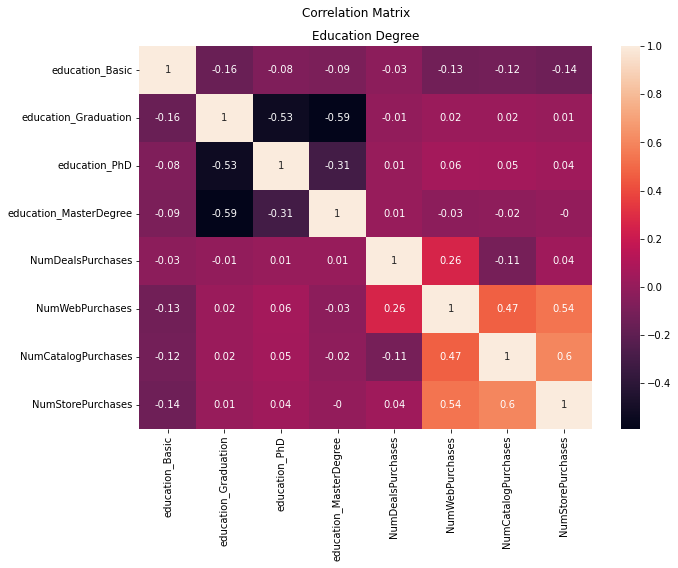

In [96]:
df_education = pd.DataFrame(df[['education_Basic', 'education_Graduation', 'education_PhD','education_MasterDegree',
       'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']])

plt.figure(figsize=(10,8))
sns.heatmap(df_education.corr().round(2),annot=True)
plt.suptitle('Correlation Matrix')
plt.title('Education Degree')
plt.tight_layout() 

**Education Degree** tidak menampilkan korelasi terhadap penjualan

# Distribution Data

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

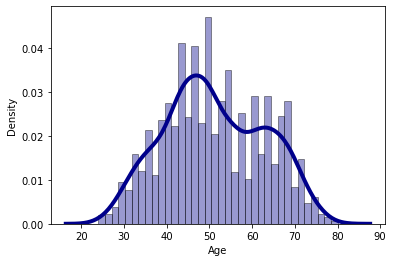

In [97]:
sns.distplot(df['Age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata-rata orang yang berbelanja adalah orang yang berumur **40-70**

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

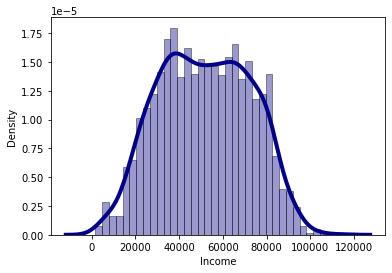

In [98]:
sns.distplot(df['Income'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Income rata-rata dari orang yang berbelanja adalah **20000 USD sampai dengan 82000 USD**

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

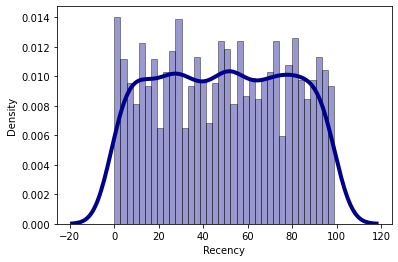

In [99]:
sns.distplot(df['Recency'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata-rata customer yang datang per hari adalah **0 - 80 customer**

In [100]:
df['Recency'].min()

0

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MntTotal', ylabel='Density'>

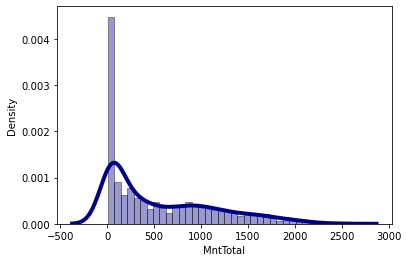

In [101]:
sns.distplot(df['MntTotal'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata-rata produk terjual perhari adalah **4 sampai 500 produk**

In [102]:
df_ca = pd.DataFrame({"Category": ['Catalog', 'Deals/Discount', 'Store','Website'],
                   "Total": [5157, 4108, 11737, 8254]})

In [103]:
df_ca

,Category,Total
0,Catalog,5157
1,Deals/Discount,4108
2,Store,11737
3,Website,8254


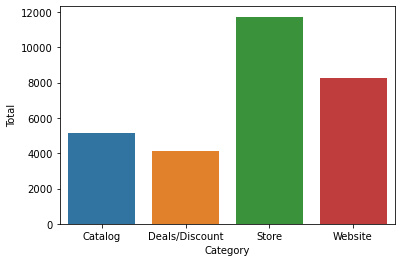

In [104]:
sns.barplot(x = 'Category',
            y = 'Total',
            data = df_ca)
 
# Show the plot
plt.show()

Barang yang paling banyak terjual berada di **Toko**, karena customer bisa langsung melakukan **checking product** pada saat berada di Toko. Penjualan melalui **website juga lebih laku dibanding katalog maupun diskon**, karena pada masa sekarang belanja juga bisa melalui gadget, sehingga lebih mudah.

In [105]:
df_rr = df.loc[: , ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum().reset_index()

In [106]:
df_rr['Category'] = df_rr['index']
df_rr['Total'] =  df_rr[0] 

In [107]:
df_rr = df_rr.drop(columns=['index',0])

In [108]:
df_rr

,Category,Total
0,AcceptedCmp1,133
1,AcceptedCmp2,26
2,AcceptedCmp3,151
3,AcceptedCmp4,155
4,AcceptedCmp5,146


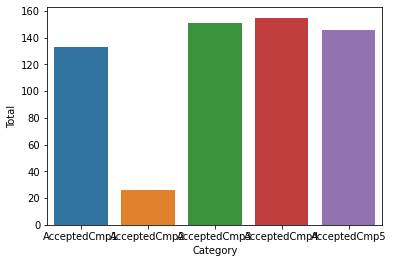

In [129]:
sns.barplot(x = 'Category',
            y = 'Total',
            data = df_rr)
 
# Show the plot
plt.show()

Campaign yang paling laku adalah campaign **nomor 4**, karena bisa jadi dari tempat yang strategis dan waktu yang tepat sehingga menghasilkan campaign yang baik.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2204
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Income                  2021 non-null   float64
 1   Kidhome                 2021 non-null   int64  
 2   Teenhome                2021 non-null   int64  
 3   Recency                 2021 non-null   int64  
 4   MntWines                2021 non-null   int64  
 5   MntFruits               2021 non-null   int64  
 6   MntMeatProducts         2021 non-null   int64  
 7   MntFishProducts         2021 non-null   int64  
 8   MntSweetProducts        2021 non-null   int64  
 9   MntGoldProds            2021 non-null   int64  
 10  NumDealsPurchases       2021 non-null   float64
 11  NumWebPurchases         2021 non-null   float64
 12  NumCatalogPurchases     2021 non-null   float64
 13  NumStorePurchases       2021 non-null   int64  
 14  NumWebVisitsMonth       2021 non-null   

In [131]:
df_product = df.loc[: , ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().reset_index()
df_product

,index,0
0,MntWines,619421
1,MntFruits,53283
2,MntMeatProducts,335607
3,MntFishProducts,75997
4,MntSweetProducts,55110
5,MntGoldProds,88766


In [132]:
df_product['Product'] = df_product['index']
df_product['Total'] =  df_product[0] 

In [133]:
df_product

,index,0,Product,Total
0,MntWines,619421,MntWines,619421
1,MntFruits,53283,MntFruits,53283
2,MntMeatProducts,335607,MntMeatProducts,335607
3,MntFishProducts,75997,MntFishProducts,75997
4,MntSweetProducts,55110,MntSweetProducts,55110
5,MntGoldProds,88766,MntGoldProds,88766


In [134]:
df_product = df_product.drop(columns=['index',0])

In [135]:
df_product

,Product,Total
0,MntWines,619421
1,MntFruits,53283
2,MntMeatProducts,335607
3,MntFishProducts,75997
4,MntSweetProducts,55110
5,MntGoldProds,88766


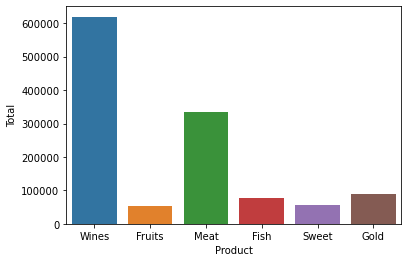

In [138]:
sns.barplot(x = 'Product',
            y = 'Total',
            data = df_product)
 
# Show the plot
plt.show()

Produk yang paling laku adalah **Wines**, produk tersebut laku bisa jadi karena **cuaca di toko tersebut sedang musim dingin**, sehingga produk wines lebih laku dibanding produk lainnya.

In [137]:
df_product.loc[0,'Product'] = 'Wines'
df_product.loc[1,'Product'] = 'Fruits'
df_product.loc[2,'Product'] = 'Meat'
df_product.loc[3,'Product'] = 'Fish'
df_product.loc[4,'Product'] = 'Sweet'
df_product.loc[5,'Product'] = 'Gold'

In [118]:
df_comp = df.loc[: , ['Response','Complain']].sum().reset_index()

In [119]:
df_comp

,index,0
0,Response,311
1,Complain,19


In [120]:
df_comp['Type'] = df_comp['index']
df_comp['Total'] =  df_comp[0] 

In [121]:
df_comp

,index,0,Type,Total
0,Response,311,Response,311
1,Complain,19,Complain,19


In [122]:
df_comp = df_comp.drop(columns=['index',0])

In [123]:
df_comp

,Type,Total
0,Response,311
1,Complain,19


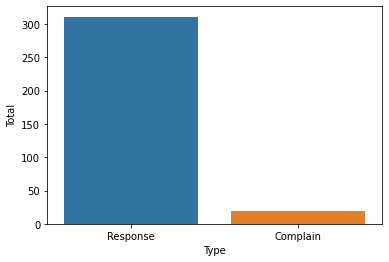

In [124]:
sns.barplot(x = 'Type',
            y = 'Total',
            data = df_comp)
 
# Show the plot
plt.show()

In [125]:
palette_color = sns.color_palette('bright')

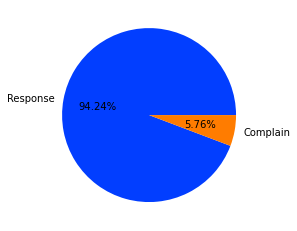

In [126]:
plt.pie(df_comp['Total'], labels=df_comp['Type'], colors=palette_color, autopct='%.2f%%')
plt.show()

Total komplain yang belum tertangani sekitar **5 persen dari total response yaitu sebanyak 19 komplain**. Detail dari komplain akan ditampilkan pada tabel dibawah

In [127]:
df2 = df.loc[(df['Complain']==1)]

In [128]:
df2

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Children,education_MasterDegree
72,26326.0,0,0,12,1,0,5,0,3,9,...,1,0,0,0,0,9,0.0,0,0,1
136,38547.0,1,0,49,6,1,10,0,1,4,...,0,0,1,0,0,18,14.0,0,1,0
257,31788.0,1,0,15,16,7,23,0,8,6,...,0,0,0,1,0,54,48.0,0,1,1
338,38643.0,1,1,45,22,2,14,0,1,10,...,0,0,1,0,0,39,29.0,0,2,0
341,65073.0,0,0,65,629,17,177,69,0,8,...,0,0,0,1,0,892,884.0,0,0,1
573,39684.0,1,0,41,19,0,35,6,4,17,...,0,0,0,0,1,64,47.0,0,1,0
952,15716.0,1,0,8,16,5,30,8,7,26,...,1,0,0,0,0,66,40.0,0,1,1
1021,38998.0,1,1,92,34,1,14,0,0,5,...,0,0,1,0,0,49,44.0,0,2,0
1049,67023.0,0,0,93,444,44,382,11,8,17,...,0,0,1,0,0,889,872.0,0,0,0
1160,48070.0,0,1,33,373,14,83,6,9,19,...,0,0,1,0,0,485,466.0,0,1,0


In [139]:
df_product['Total'].sum()

1228184

Total produk yang terjual adalah **1.228.184 Produk**

In [140]:
df['Recency'].sum()

98788

Total customer yang datang adalah **98.788 Customer**

# Kesimpulan

Berdasarkan **EDA Marketing** diatas, didapat beberapa kesimpulan sebagai berikut.
- Data dari marketing mempunyai 184 kolom duplikasi dan harus dihapus.
- Terlihat bahwa variabel **Income** mempunyai korelasi pada **Web, Catalog, dan Store** artinya jika income seseorang meningkat maka kebiasaan membeli juga meningkat.
- Rata-rata orang yang berbelanja adalah orang yang berumur **40-70**. Karena kebiasaan berbelanja menjadi kebutuhan primer terutama oleh orang tua untuk memenuhi kehidupan keluarga.
- Income rata-rata dari orang yang berbelanja adalah **20000 USD sampai dengan 82000 USD** per tahun. Artinya customer berasal dari negara maju karena pendapatan per tahun negara maju mulai dari **11,000 USD**.
- Rata-rata customer yang datang per hari adalah **0 - 80 customer** dan membeli **4 sampai 500 produk**. Untuk masalah customer perlu ditambah kampanye atau marketing yang lebih menarik pelanggan seperti, marketing di TV, Media Sosial, ataupun Diskon per akhir bulan.
- Barang yang paling banyak terjual berada di **Toko**, karena customer bisa langsung melakukan **checking product** pada saat berada di Toko. Penjualan melalui **website juga lebih laku dibanding katalog maupun diskon**, karena pada masa sekarang belanja juga bisa melalui gadget, sehingga lebih mudah.
- Campaign yang paling laku adalah campaign **nomor 4**, karena bisa jadi dari tempat yang strategis dan waktu yang tepat sehingga menghasilkan campaign yang baik.
- Produk yang paling laku adalah **Wines**, produk tersebut laku bisa jadi karena **cuaca di toko tersebut sedang musim dingin**, sehingga produk wines lebih laku dibanding produk lainnya.
- Total komplain yang belum tertangani sekitar **5 persen dari total response yaitu sebanyak 19 komplain**. Hal tersebut perlu diselesaikan agar menaikkan review dari toko tersebut.